In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [3]:
new=pd.read_excel('Data_Train2.xlsx')

In [4]:
test=pd.read_excel('Data_Test1.xlsx')

In [5]:
new.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [6]:
test.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [7]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STORY   2748 non-null   object
dtypes: object(1)
memory usage: 21.6+ KB


In [11]:
new['STORY'].nunique()

7548

In [12]:
test['STORY'].nunique()

2737

In [13]:
new['SECTION'].nunique()

4

In [16]:
new['text length']=new['STORY'].apply(len)

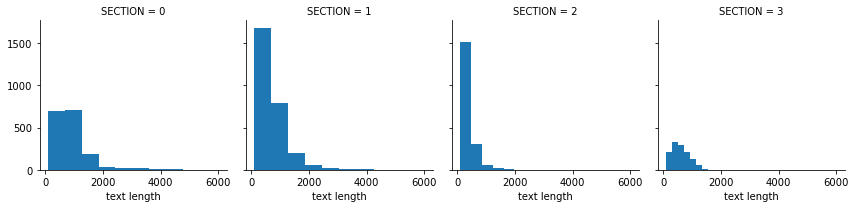

In [17]:
g=sns.FacetGrid(new, col='SECTION')
g.map(plt.hist,'text length')

In [18]:
X=new['STORY']
y=new['SECTION']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv=CountVectorizer()
X=cv.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
nb=MultinomialNB()

In [33]:
nb.fit(X_train,y_train)

MultinomialNB()

In [41]:
predictions=nb.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[527   8   4   5]
 [  8 905   8  11]
 [ 20  10 617   3]
 [  4   5   0 383]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       544
           1       0.98      0.97      0.97       932
           2       0.98      0.95      0.96       650
           3       0.95      0.98      0.96       392

    accuracy                           0.97      2518
   macro avg       0.96      0.97      0.96      2518
weighted avg       0.97      0.97      0.97      2518



In [44]:
X1 = test['STORY']
X1 = cv.transform(X1)
test_predict=nb.predict(X1)
print(test_predict)

[1 2 1 ... 1 0 1]


In [45]:
y_test_pred=pd.DataFrame(test_predict,columns=['SECTION'])


In [48]:
y_test_pred.head()

,SECTION
0,1
1,2
2,1
3,0
4,1


In [49]:
test.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [53]:
y_test_pred.to_csv('submission1.csv', index=False)